In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import tree
from sklearn import ensemble
from sklearn import datasets, linear_model
from sklearn import cross_validation, svm
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def pca(X, wsp):
    n,m = np.shape(X)
    X_mean = np.mean(X, axis = 0)
    X_std = np.std(X,axis = 0)
    X_standarized = (X - X_mean)/X_std
    S = np.cov(X_standarized.T)
    D,V = np.linalg.eigh(S)
    #rint "suma wartosci wlasnych:",np.sum(D)
    Y = np.dot(V.T,X_standarized.T).T
    D_bis = np.matrix(1/np.sqrt(D)).reshape(m,1)
    Y_new = np.multiply(D_bis,Y.T).T
    k = 1; 
    suma = np.sum(D)
    while(np.sum(D[-k:])/suma < wsp):
        k = k+1
    return Y_new[:,-k:], D[-k:], V[:,-k:], k


def PCA(X, k):
    n,m = np.shape(X)
    X_mean = np.mean(X, axis = 0)
    X_std = np.std(X,axis = 0)
    X_standarized = (X - X_mean)/X_std
    S = np.cov(X_standarized.T)
    D,V = np.linalg.eigh(S)
    #print "suma wartosci wlasnych:",np.sum(D)
    Y = np.dot(V.T,X_standarized.T).T
    D_bis = np.matrix(1/np.sqrt(D)).reshape(m,1)
    Y_new = np.multiply(D_bis,Y.T).T
    #print Y_new
    return Y_new[:,-k:]

In [66]:
wine = pd.read_csv("wine.csv")
wine.head()
y = (wine['Wine']).as_matrix()
X = (wine.drop('Wine',axis = 1)).as_matrix()
print X.shape
print np.unique(y)

(178, 13)
[1 2 3]


In [96]:
def multiplot(X, y, labels, colors):
    N, d = X.shape
    plt.figure(figsize=(12,12))
    if(d > 5): d = 5
    for i in xrange(d):
        for j in xrange(i+1,d):
            plt.subplot(d, d, i * d + j + 1)
            for label, color in zip(labels, colors):
                plt.scatter(X[y == label, i], X[y == label, j], c = color)
    plt.show()

def singleplot(X, y, labels, colors):
    plt.figure(figsize=(6,6))
    for label, color in zip(labels, colors):
        plt.scatter(X[y == label, 0], X[y == label, 1], c = color)
    plt.show()

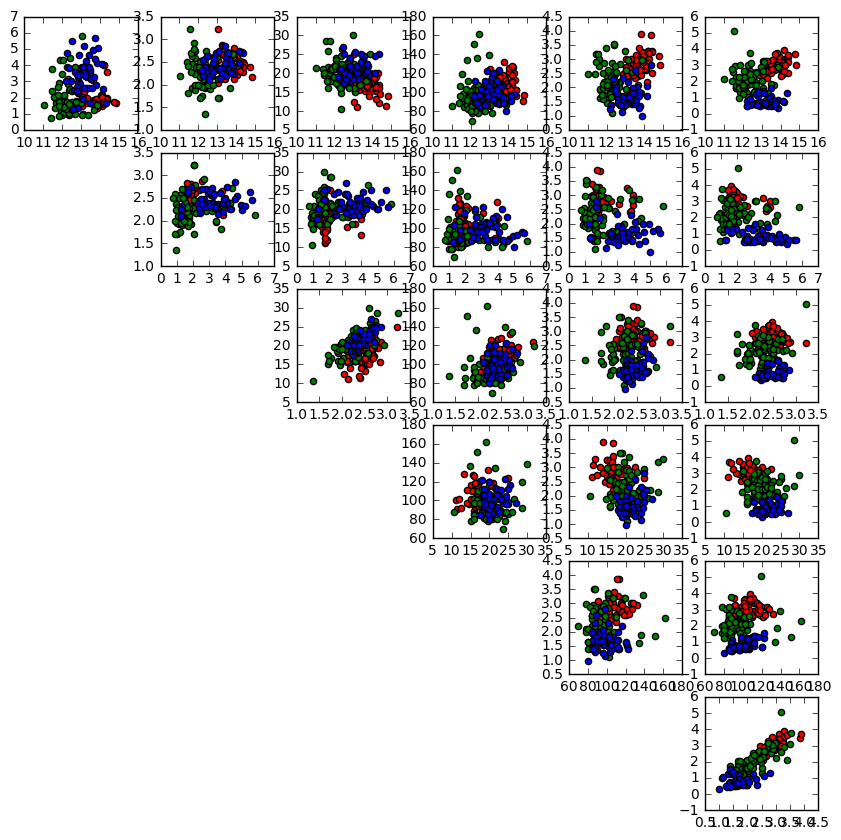

In [68]:
multiplot(X,y,[1,2,3],"rgb")

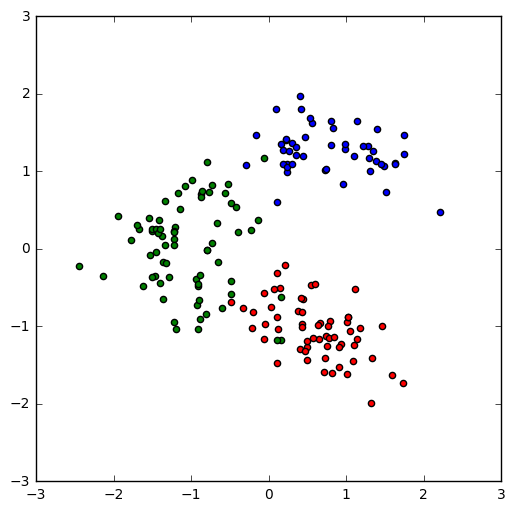

In [69]:
Y_2 = PCA(X,2)
singleplot(Y_2,y,[1,2,3],"rgb")

10


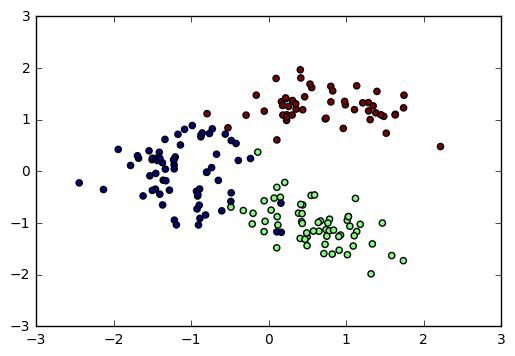

In [70]:
Y,D,V,k = pca(X,0.95)
print k
k_means = KMeans(init='k-means++', n_clusters=3, n_init=100)
k_means.fit(Y)
plt.scatter(Y[:,-2], Y[:,-1], c = k_means.labels_)
plt.show()
#idealnie pogrupowal

5


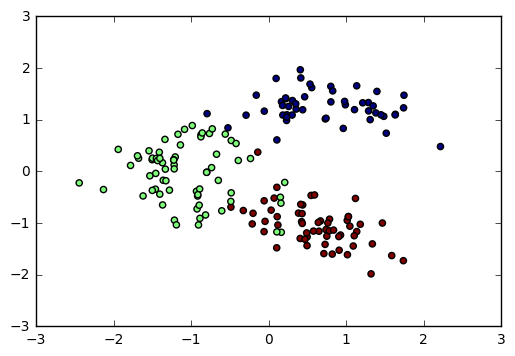

In [71]:
Y_1,D,V,k = pca(X,0.8)
print k
k_means = KMeans(init='k-means++', n_clusters=3, n_init=100)
k_means.fit(Y_1)
plt.scatter(Y_1[:,-2], Y_1[:,-1], c = k_means.labels_)
plt.show()
#juz nie tak dobrze ale duzo mniej danych

In [72]:
t = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_validation.cross_val_score(t, X, y, cv=5)
print scores.mean()

0.860724253665


In [73]:
t = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_validation.cross_val_score(t, Y, y, cv=5)
print scores.mean()

0.927566053448


2


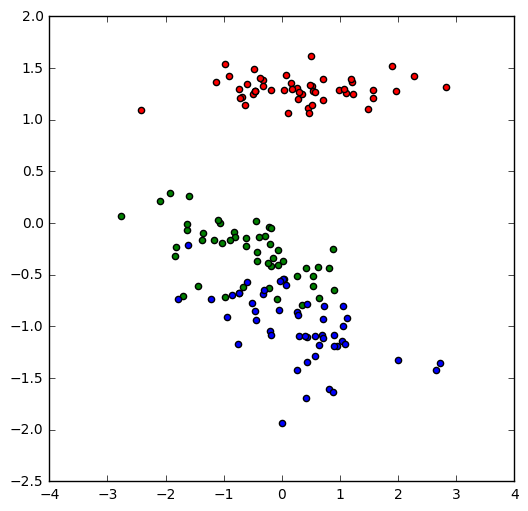

In [74]:
from sklearn import datasets
iris = datasets.load_iris();
X = iris.data
Y,D,V,k = pca(X,0.95)
print k
y = iris.target
singleplot(Y,y,[0,1,2],"rgb")

In [75]:
k_means1 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means1.fit(Y)
k_means2 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means2.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

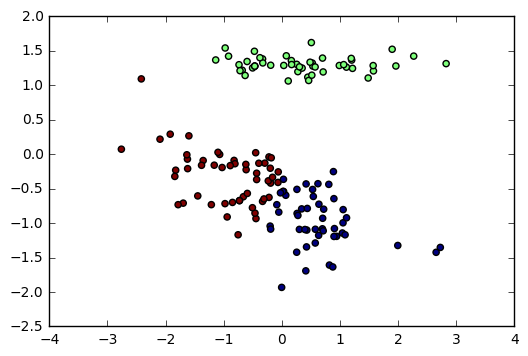

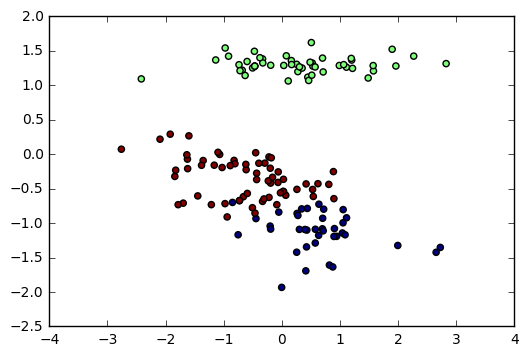

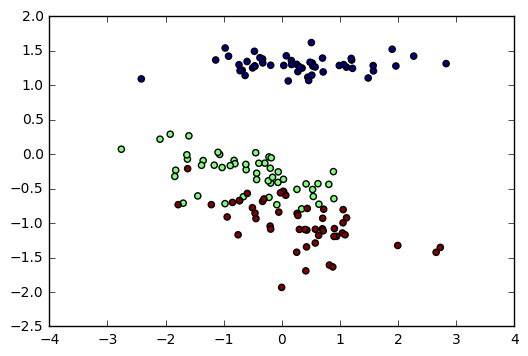

Silhoute:  0.478016107458
Silhoute:  0.552591944521


In [76]:
plt.scatter(Y[:,-2], Y[:,-1], c = k_means1.labels_)
plt.show()
plt.scatter(Y[:,-2], Y[:,-1], c = k_means2.labels_)
plt.show()
plt.scatter(Y[:,-2], Y[:,-1], c = y)
plt.show()

print "Silhoute: ",silhouette_score(Y, k_means1.labels_)
print "Silhoute: ",silhouette_score(X, k_means2.labels_)

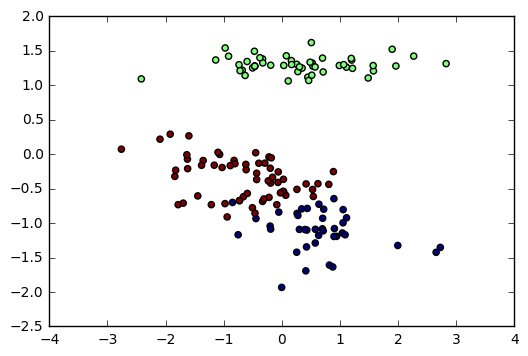

Silhoute:  0.597564910058


In [77]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
X_new = pca1.fit_transform(X)
k_means3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means3.fit(X_new)
plt.scatter(Y[:,-2], Y[:,-1], c = k_means3.labels_)
plt.show()
print "Silhoute: ",silhouette_score(X_new, k_means3.labels_)
# troche inaczej wyglada niz moje :(

[0 1]
(8124, 22)


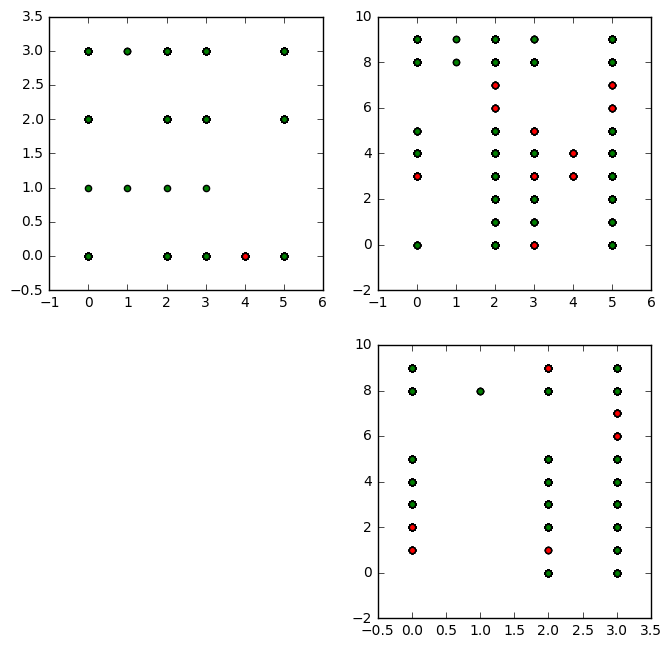

In [99]:
mushroom = pd.read_csv("mushrooms.csv")
mushroom = mushroom.dropna()

for column in mushroom.columns:
    mushroom[column] = pd.Categorical.from_array(mushroom[column]).codes
mushroom.head()
y = (mushroom['type']).as_matrix()
print np.unique(y)
X = (mushroom.drop('type',axis = 1)).as_matrix()
print X.shape
multiplot(X,y,[0,1],"rg")
#Y,D,V,k = pca(X,0.95)

#print k

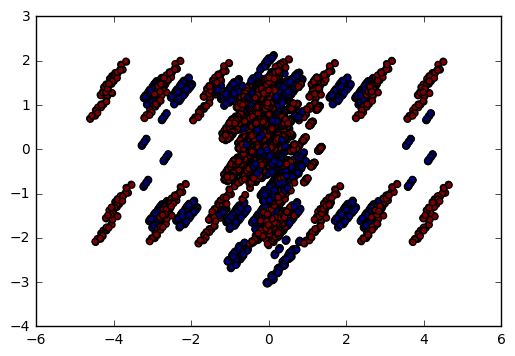

In [100]:
pca2 = PCA(n_components=10)
X_new = pca2.fit_transform(X)
plt.scatter(X_new[:,-2], X_new[:,-1], c = y)
plt.show()

In [101]:
t = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_validation.cross_val_score(t, X, y, cv=5)
print scores.mean()
#t = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_validation.cross_val_score(t, X_new, y, cv=5)
print scores.mean()

0.860656425637
0.81599177593


In [102]:
Y,D,V,k = pca(X,0.95)

LinAlgError: Eigenvalues did not converge

In [103]:
cars = pd.read_csv("car.csv")
cars = cars.dropna()
cars = cars.drop('Unnamed: 0',axis=1)
y = cars['class'].as_matrix()
print(np.unique(y))
print X.shape
X = cars.drop('class',axis = 1).as_matrix()
Y,D,V,k = pca(X,0.95)
print k

[1 2 3 4]
(8124, 22)
6


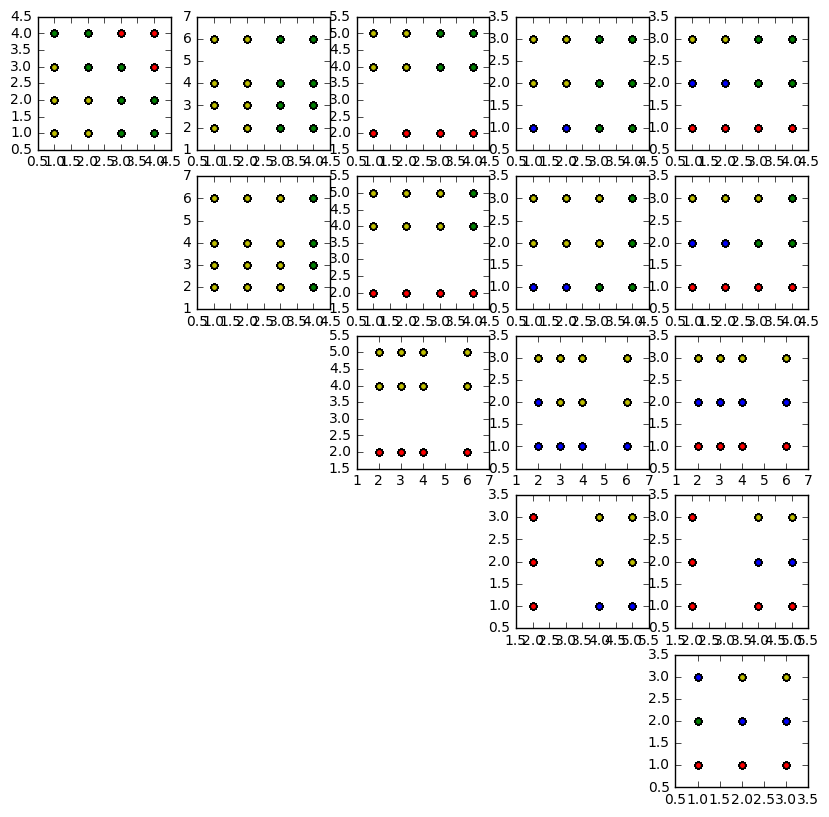

In [104]:
multiplot(X,y,[1,2,3,4],"rgby")

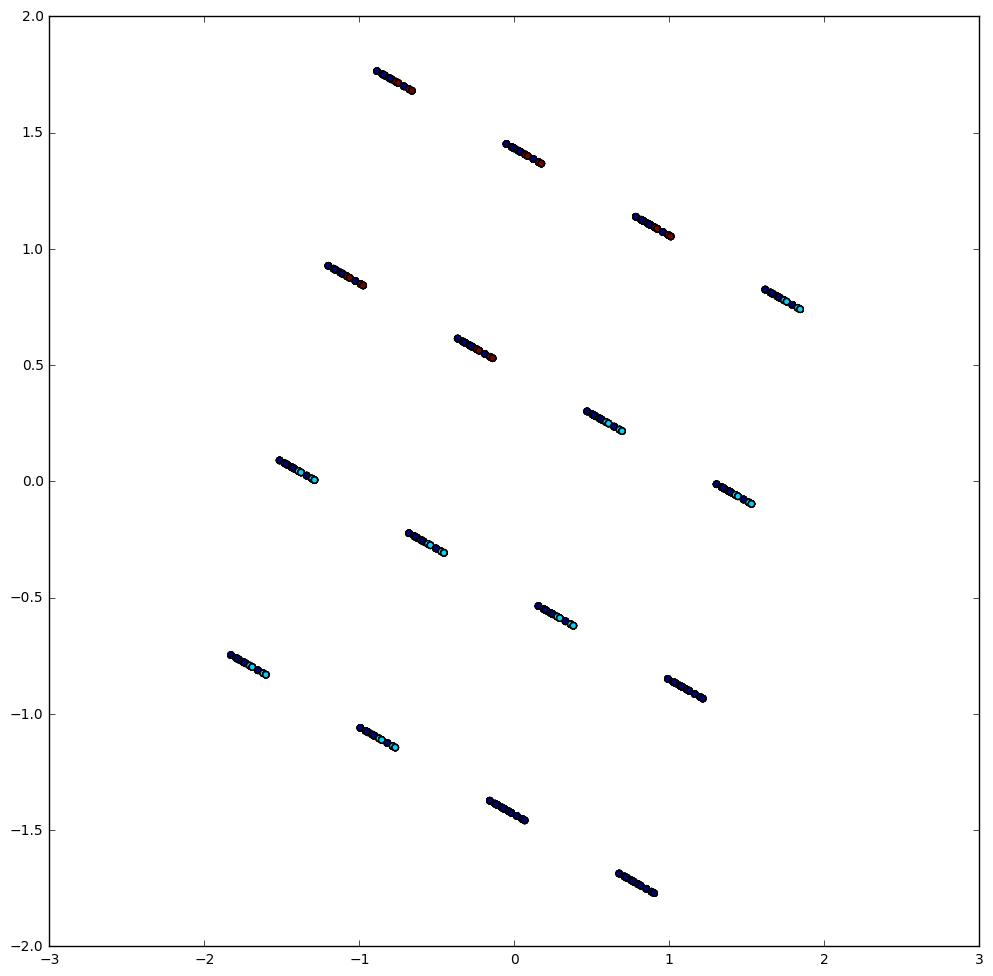

In [106]:
plt.figure(figsize=(12,12))
plt.scatter(Y[:,-2], Y[:,-1], c = y)
plt.show()

In [113]:
t = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_validation.cross_val_score(t, X, y, cv=10)
print scores.mean()
#t = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_validation.cross_val_score(t, Y, y, cv=10)
print scores.mean()

0.752813214887
0.814534214163


In [126]:
adult = pd.read_csv("adult.csv")
print adult.shape
adult.head()

(32561, 15)


,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [127]:
adult.dropna()
print adult.shape
print adult.columns

(32561, 15)
Index([u'Age', u' workclass', u' fnlwgt', u' education', u' education-num',
       u' marital-status', u' occupation', u' relationship', u' race', u' sex',
       u' capital-gain', u' capital-loss', u' hours-per-week',
       u' native-country', u' class'],
      dtype='object')


In [128]:
names = ['Age',' fnlwgt',' education-num',' capital-gain',' capital-loss',' hours-per-week']
for column in adult.columns:
    if not(column in names): 
        adult[column] = pd.Categorical.from_array(adult[column]).codes
adult.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [134]:
y = adult[' class'].as_matrix()
X = adult.drop(' class',axis = 1).as_matrix()
Y,D,V,k = pca(X,0.95)
print k

13


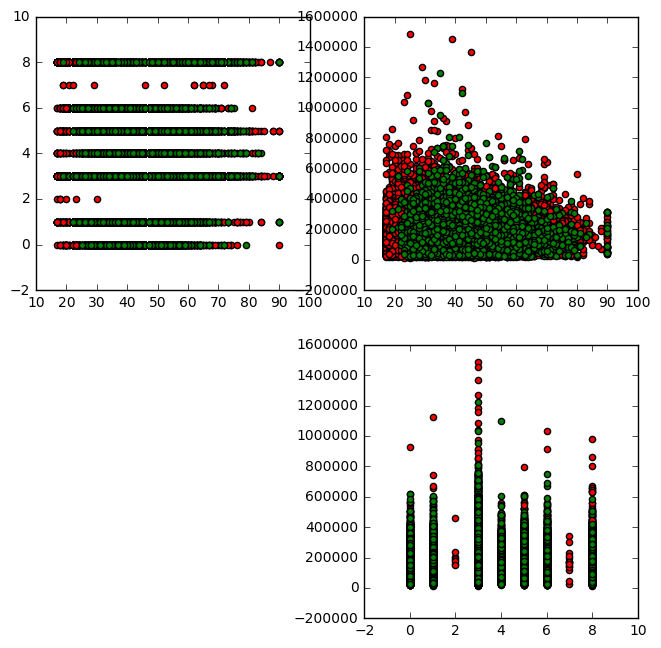

In [135]:
multiplot(X,y,[0,1],"rg")

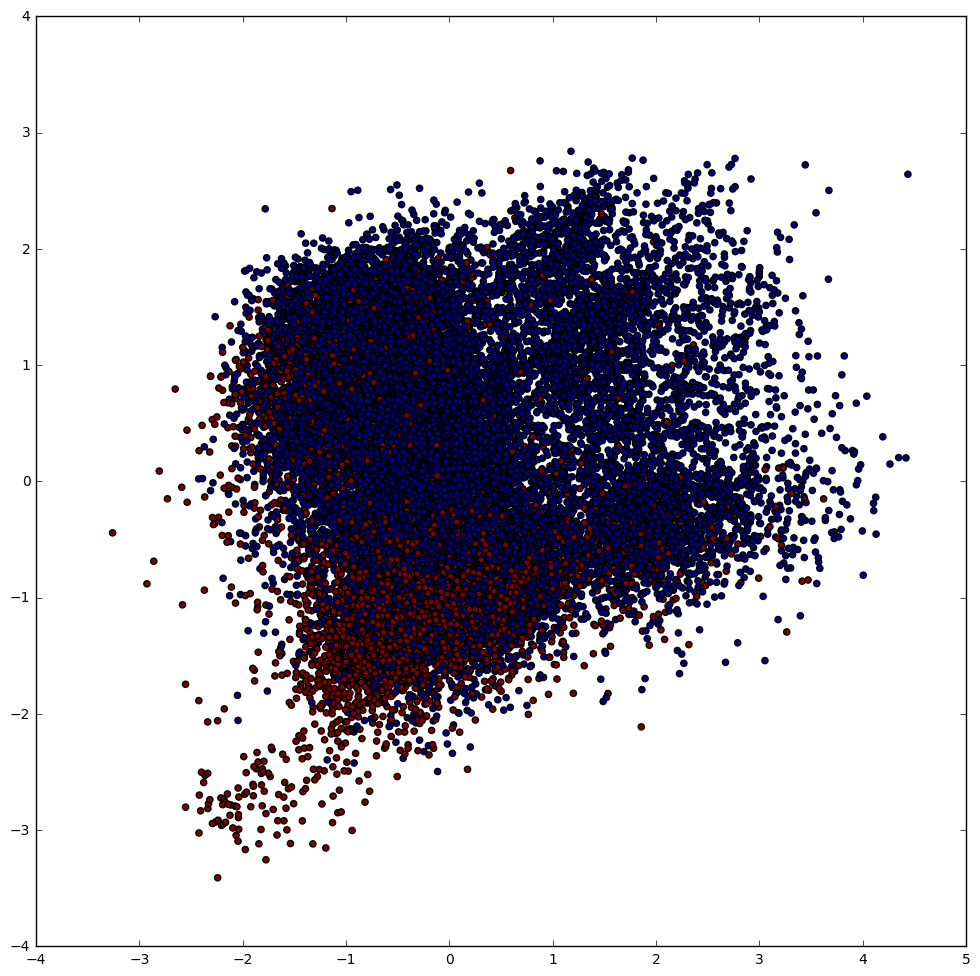

In [137]:
plt.figure(figsize=(12,12))
plt.scatter(Y[:,-2], Y[:,-1], c = y)
plt.show()

In [141]:
k_means1 = KMeans(init='k-means++', n_clusters=2, n_init=3)
k_means1.fit(Y)
k_means2 = KMeans(init='k-means++', n_clusters=2, n_init=3)
k_means2.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=3,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

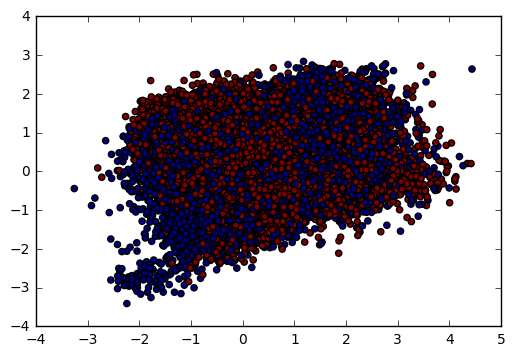

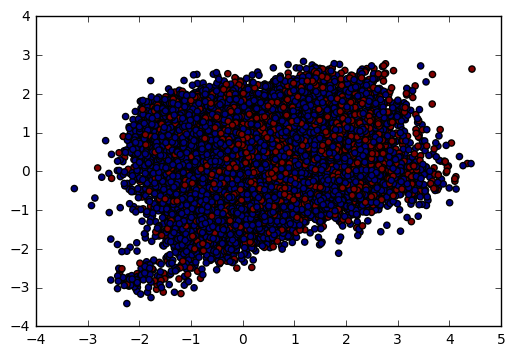

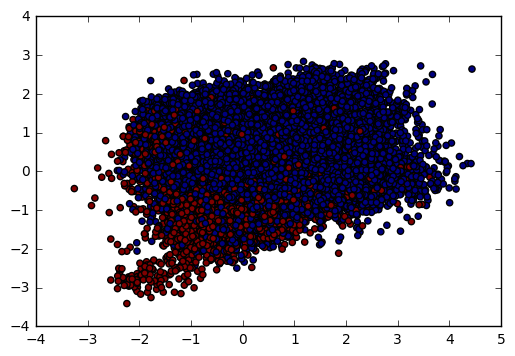

In [143]:
plt.scatter(Y[:,-2], Y[:,-1], c = k_means1.labels_)
plt.show()
plt.scatter(Y[:,-2], Y[:,-1], c = k_means2.labels_)
plt.show()
plt.scatter(Y[:,-2], Y[:,-1], c = y)
plt.show()

In [145]:
t = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_validation.cross_val_score(t, X, y, cv=10)
print scores.mean()
#t = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_validation.cross_val_score(t, Y, y, cv=10)
print scores.mean()

0.839870060629
0.818249061368


In [150]:
Y,D,V,k = pca(X,0.5)
print k 
#zmiejszanie grup nie powoduje wiekszego bledu kalsyfikatora

5


In [151]:
t = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_validation.cross_val_score(t, X, y, cv=10)
print scores.mean()
#t = tree.DecisionTreeClassifier(max_depth=3)
scores = cross_validation.cross_val_score(t, Y, y, cv=10)
print scores.mean()

0.839870060629
0.803016070471


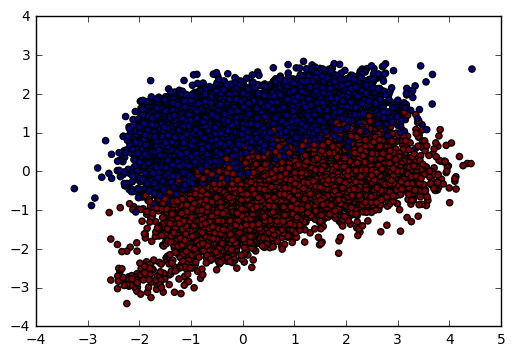

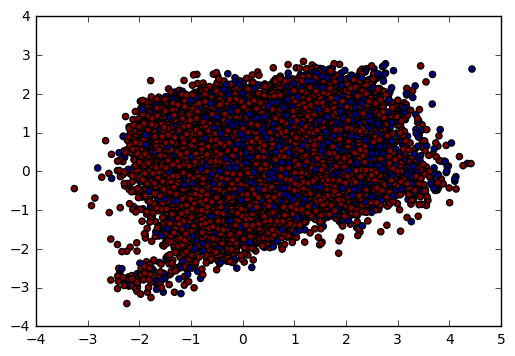

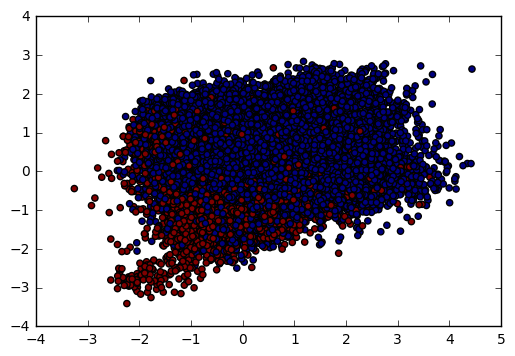

In [152]:
k_means1 = KMeans(init='k-means++', n_clusters=2, n_init=3)
k_means1.fit(Y)
k_means2 = KMeans(init='k-means++', n_clusters=2, n_init=3)
k_means2.fit(X)
plt.scatter(Y[:,-2], Y[:,-1], c = k_means1.labels_)
plt.show()
plt.scatter(Y[:,-2], Y[:,-1], c = k_means2.labels_)
plt.show()
plt.scatter(Y[:,-2], Y[:,-1], c = y)
plt.show()